<a href="https://colab.research.google.com/github/Rishabhyadav888/Airbnb-Data-Analysis/blob/main/Rishabh_kr_yadav_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**
# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb=df.copy()

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Remove/replace all nan values**

In [ ]:
airbnb["reviews_per_month"].fillna(0.0,inplace=True)

In [ ]:
airbnb["name"].fillna("no_property_description",inplace=True)

In [ ]:
airbnb["host_name"].fillna("no_host_name",inplace=True)

In [ ]:
airbnb["last_review"].fillna("0000-00-00",inplace=True)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **which is the height hosting location in neighbourhood group?**

In [ ]:
height_hosting_location=airbnb.groupby("neighbourhood_group")["calculated_host_listings_count"].count().reset_index()

In [ ]:
height_hosting_location.set_index("neighbourhood_group",inplace=True)

In [ ]:
height_hosting_location

,calculated_host_listings_count
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['xtick.labelsize'] = 15 
plt.rcParams['ytick.labelsize'] = 15 

Text(0, 0.5, 'Number of hosting')

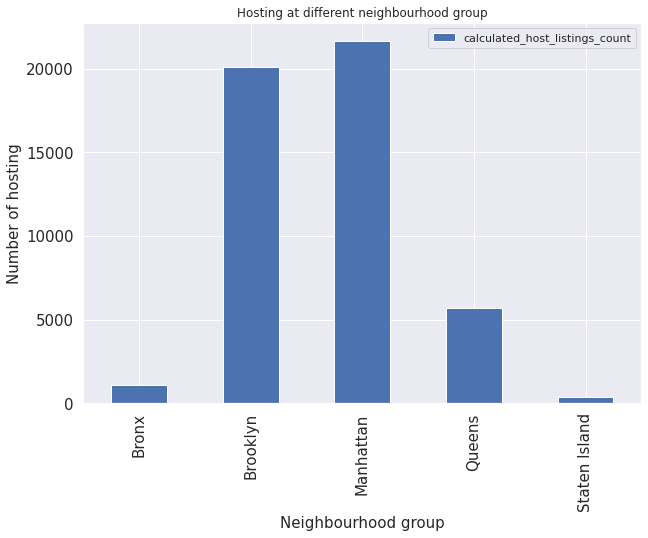

In [ ]:
height_hosting_location.plot(kind="bar")

plt.title("Hosting at different neighbourhood group")
plt.xlabel("Neighbourhood group",fontsize=15)
plt.ylabel("Number of hosting",fontsize=15)

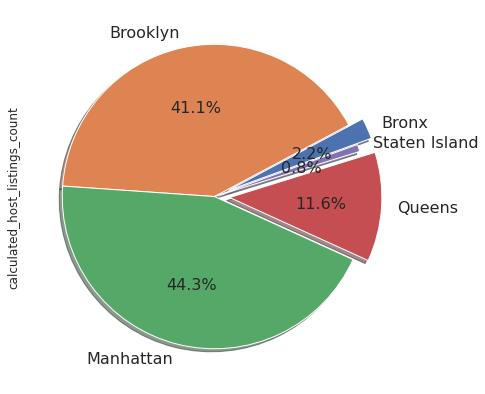

In [ ]:
height_hosting_location.plot.pie(y='calculated_host_listings_count', legend=False, \
                   autopct='%1.1f%%', explode=(0.1, 0, 0, 0.1, 0), \
                   shadow=True,radius = 1, textprops = {"fontsize":16},startangle=20)

plt.show()

# **which is the best tourist place in neighbourhood group?**

In [ ]:
best_tourist_places=airbnb.groupby("neighbourhood_group")["number_of_reviews"].sum()

In [ ]:
best_tourist_places

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

Text(0, 0.5, 'Number of tourist')

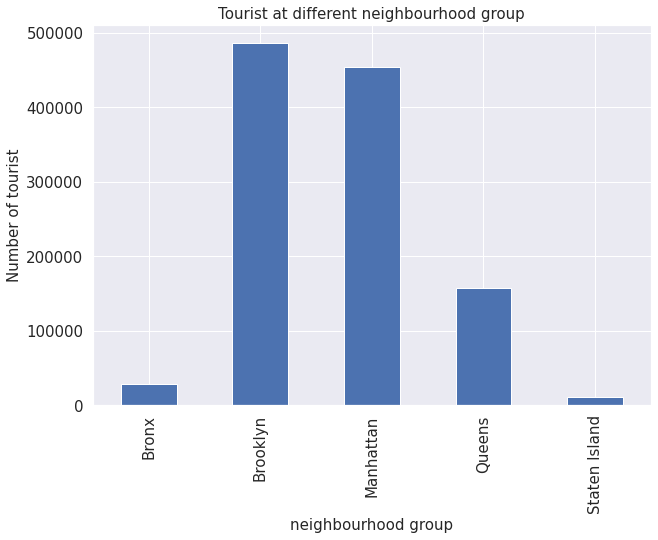

In [ ]:
best_tourist_places.plot(kind="bar")
plt.title("Tourist at different neighbourhood group",fontsize=15)
plt.xlabel("neighbourhood group",fontsize=15)
plt.ylabel("Number of tourist",fontsize=15)

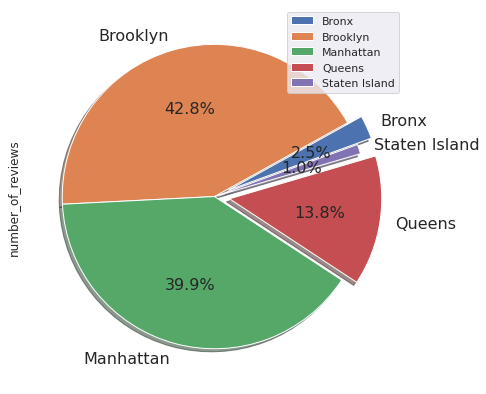

In [ ]:
best_tourist_places.plot.pie(y='calculated_host_listings_count', legend=False, \
                   autopct='%1.1f%%', explode=(0.1, 0, 0, 0.1, 0), \
                   shadow=True,radius = 1, textprops = {"fontsize":16},startangle=20)
plt.legend()
plt.show()

# **what is the increase in customer & hosting during years?**

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
airbnb['last_review'].replace(
    to_replace=["0000-00-00"],
    value=np.nan,
    inplace=True
)

In [ ]:
airbnb_date=airbnb[~airbnb["last_review"].isna()]

In [ ]:
airbnb_date['year'] = pd.DatetimeIndex(airbnb_date['last_review']).year
airbnb_date['month'] = pd.DatetimeIndex(airbnb_date['last_review']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
icrease_in_customer_host=airbnb_date.groupby("year").agg({"number_of_reviews":"max","calculated_host_listings_count":"max"})

In [ ]:
icrease_in_customer_host

,number_of_reviews,calculated_host_listings_count
year,,
2011,25,28
2012,68,52
2013,25,3
2014,62,52
2015,109,52
2016,193,121
2017,259,121
2018,467,232
2019,629,327


Text(0, 0.5, 'Number of coustomer & host')

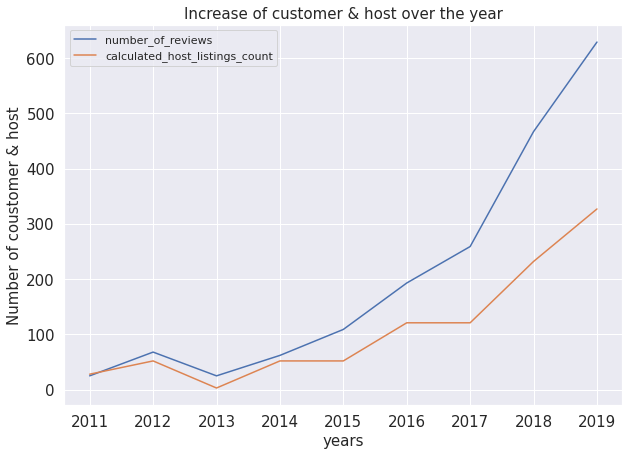

In [ ]:

icrease_in_customer_host.plot(kind="line")
plt.title("Increase of customer & host over the year",fontsize=15)
plt.xlabel("years",fontsize=15)
plt.ylabel("Number of coustomer & host",fontsize=15)

# **what is the average customer as per room hosted in list present at those neighbourhood_group?**

In [ ]:
airbnb1=airbnb.groupby("neighbourhood_group").agg({"calculated_host_listings_count":"sum","number_of_reviews":"sum"})

In [ ]:
airbnb1["avg_customer_per_room"]=airbnb1["number_of_reviews"]/airbnb1["calculated_host_listings_count"]

In [ ]:
airbnb1

,calculated_host_listings_count,number_of_reviews,avg_customer_per_room
neighbourhood_group,,,
Bronx,2437,28371,11.641773
Brooklyn,45925,486574,10.594970
Manhattan,277073,454569,1.640611
Queens,23005,156950,6.822430
Staten Island,865,11541,13.342197


In [ ]:
total_customer_per_room=airbnb1.groupby("neighbourhood_group")["avg_customer_per_room"].sum()

Text(0, 0.5, 'Avg customer per room')

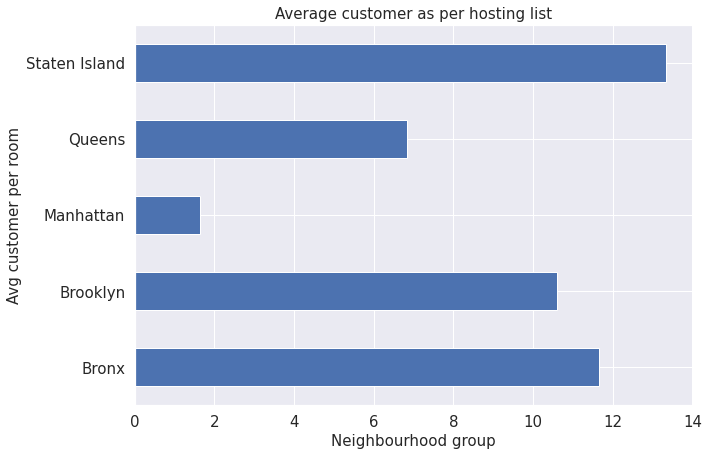

In [ ]:
total_customer_per_room.plot(kind="barh")
plt.title("Average customer as per hosting list",fontsize=15)
plt.xlabel("Neighbourhood group",fontsize=15)
plt.ylabel("Avg customer per room",fontsize=15)

# **Room type preferred by the touriest in different neighbourhood group?**

In [ ]:
room_preferred_by_touriest =airbnb.groupby(["neighbourhood_group","room_type"])["number_of_reviews"].sum().unstack()

Text(0, 0.5, 'sum of reviews')

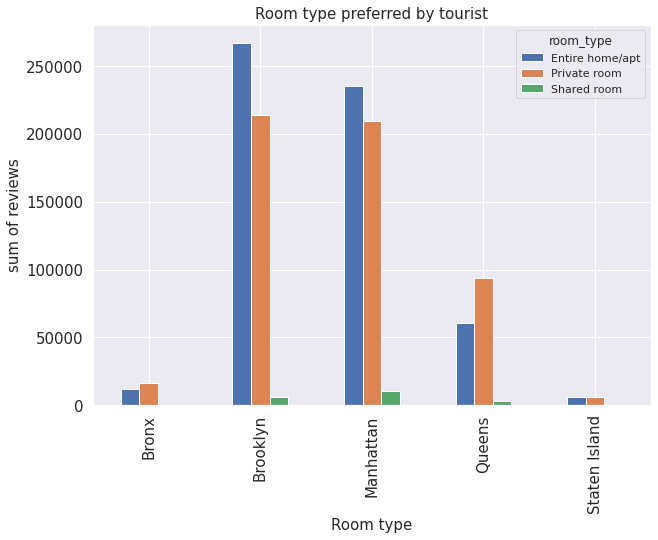

In [ ]:
room_preferred_by_touriest.plot(kind="bar")
plt.title("Room type preferred by tourist",fontsize=15)
plt.xlabel("Room type",fontsize=15)
plt.ylabel("sum of reviews",fontsize=15)

# **What is the average price as per the room type in different neighbourhood group?**

In [ ]:
max_room_price =airbnb.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()

In [ ]:
max_room_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Avg price of room type')

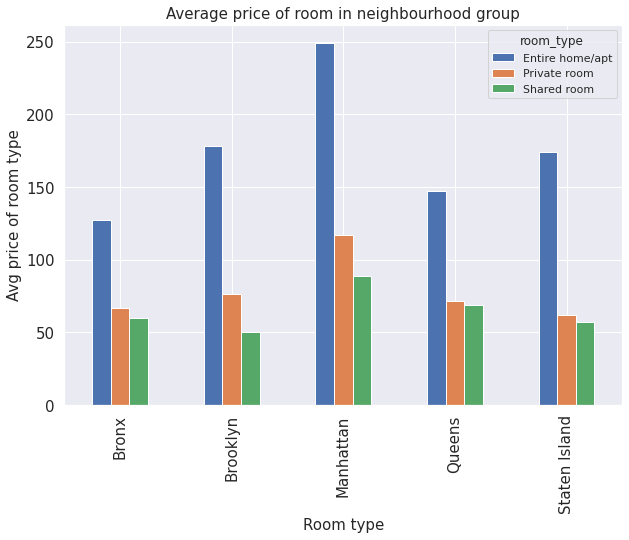

In [ ]:

max_room_price.plot(kind="bar")
plt.title("Average price of room in neighbourhood group",fontsize=15)
plt.xlabel("Room type",fontsize=15)
plt.ylabel("Avg price of room type",fontsize=15)


# **Average night stayed by touriest in different room type in different neighbourhood group?**



In [ ]:
average_night_stay_room =airbnb.groupby(["neighbourhood_group","room_type"])["minimum_nights"].median().unstack()

Text(0, 0.5, 'Avg night stayed')

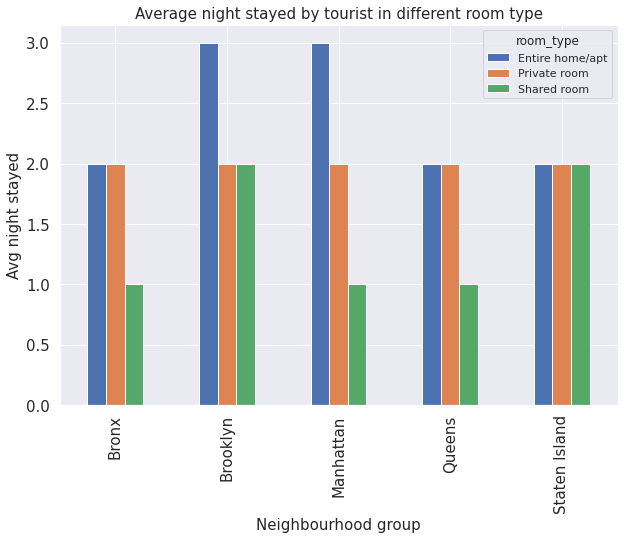

In [ ]:
average_night_stay_room.plot(kind="bar")
plt.title("Average night stayed by tourist in different room type",fontsize=15)
plt.xlabel("Neighbourhood group",fontsize=15)
plt.ylabel("Avg night stayed",fontsize=15)

# **Max room type hosted in different neighbourhood group?**

In [ ]:
max_room_type_hosted=airbnb.groupby(["neighbourhood_group","room_type"])["calculated_host_listings_count"].max().unstack()

In [ ]:
max_room_type_hosted

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,13,37,13
Brooklyn,232,103,34
Manhattan,327,327,28
Queens,15,103,18
Staten Island,7,8,7


Text(0, 0.5, 'Host listing count')

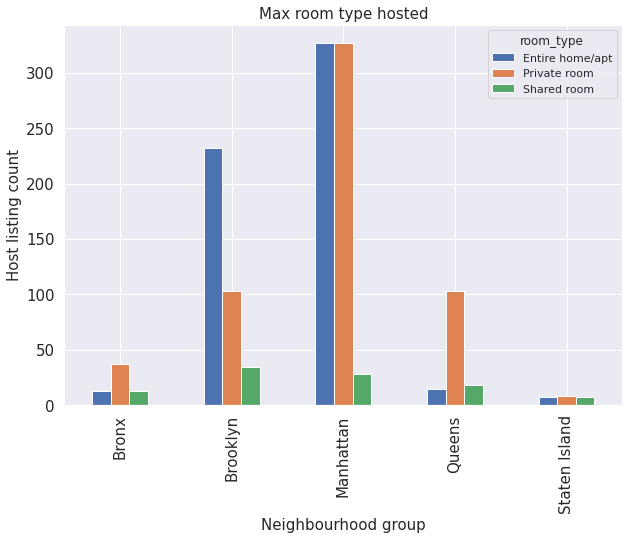

In [ ]:
max_room_type_hosted.plot(kind="bar")
plt.title("Max room type hosted",fontsize=15)
plt.xlabel("Neighbourhood group",fontsize=15)
plt.ylabel("Host listing count",fontsize=15)

# **What is the availability of room at different neighbourhood group?**

In [ ]:
availability_room=airbnb.groupby(["neighbourhood_group"])["availability_365"].mean()

Text(0, 0.5, 'Avg availability of room ')

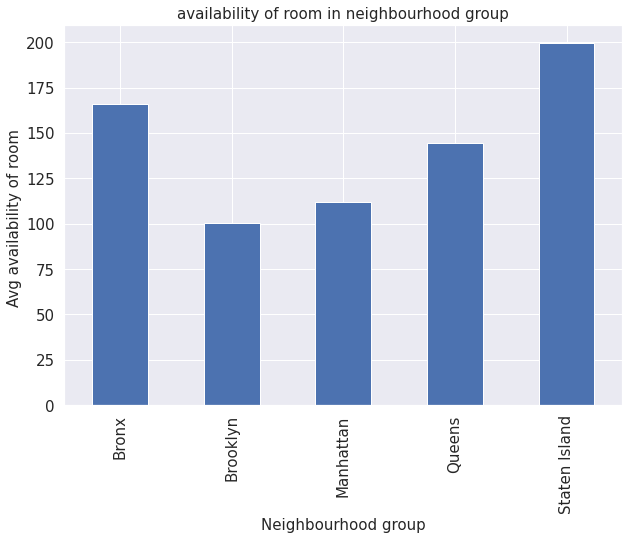

In [ ]:
availability_room.plot(kind="bar")
plt.title("availability of room in neighbourhood group",fontsize=15)
plt.xlabel("Neighbourhood group",fontsize=15)
plt.ylabel("Avg availability of room ",fontsize=15)

# **Which neighbourhood is prefered by tourist in Brooklyn?**

In [ ]:
airbnb_brooklyn = airbnb[airbnb["neighbourhood_group"]=="Brooklyn"]

In [ ]:
best_neighbourhood_in_brooklyn=airbnb_brooklyn.groupby("neighbourhood")["number_of_reviews"].sum().reset_index().sort_values(["number_of_reviews"],ascending=False).head(10)

In [ ]:
best_neighbourhood_in_brooklyn.set_index("neighbourhood",inplace=True)

In [ ]:
best_neighbourhood_in_brooklyn

,number_of_reviews
neighbourhood,
Bedford-Stuyvesant,110352
Williamsburg,85427
Bushwick,52514
Crown Heights,36408
Greenpoint,19429
Park Slope,14638
Clinton Hill,14586
Prospect-Lefferts Gardens,14051
Flatbush,12787


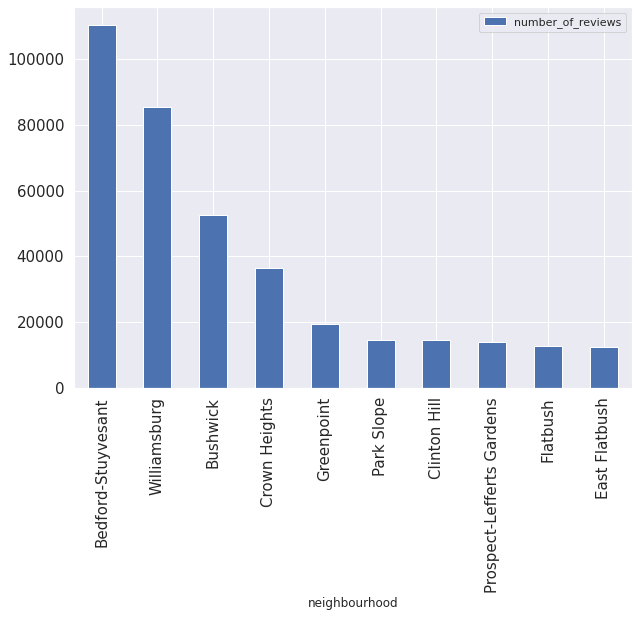

In [ ]:
best_neighbourhood_in_brooklyn.plot(kind="bar")

# **In which month the rate of tourist visit is high in Brooklyn in year 2018?**

In [ ]:
airbnb_2018=airbnb_date[(airbnb_date["year"]==2018)&(airbnb_date["neighbourhood_group"]=="Brooklyn")]

In [ ]:
airbnb_2018.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
42,12303,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,25,2018-09-30,0.23,1,311,2018,9
86,19812,2 bedroom Williamsburg Apt - Bedford L stop,74857,Starlee,Brooklyn,Williamsburg,40.71833,-73.95748,Entire home/apt,105,3,61,2018-08-09,0.53,1,272,2018,8


In [ ]:
monthly_touriest_visit =airbnb_2018.groupby("month")["number_of_reviews"].sum()

Text(0, 0.5, 'sum of reviews')

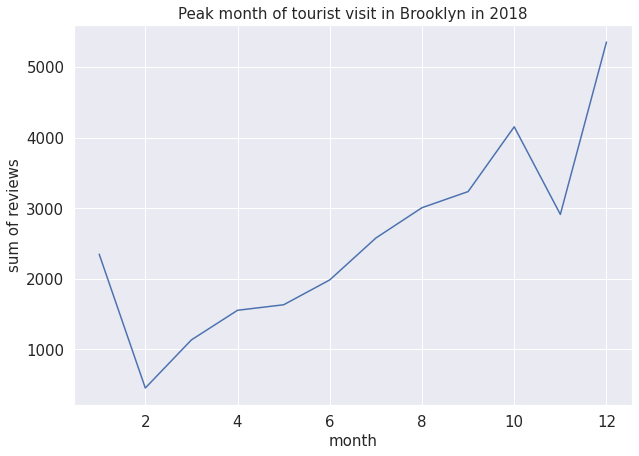

In [ ]:
monthly_touriest_visit.plot(kind="line")
plt.title("Peak month of tourist visit in Brooklyn in 2018",fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel("sum of reviews",fontsize=15)

# **Top 10 host with maximum number of listings in 2019?**

In [ ]:
airbnb_2019=airbnb_date[(airbnb_date["year"]==2019)]

In [ ]:
host_with_max_listing=airbnb_2019.groupby(["host_name"])["calculated_host_listings_count"].max().reset_index().sort_values(["calculated_host_listings_count"],ascending=False).head(10)

In [ ]:
host_with_max_listing.set_index("host_name",inplace=True)

Text(0, 0.5, 'Max host listing count ')

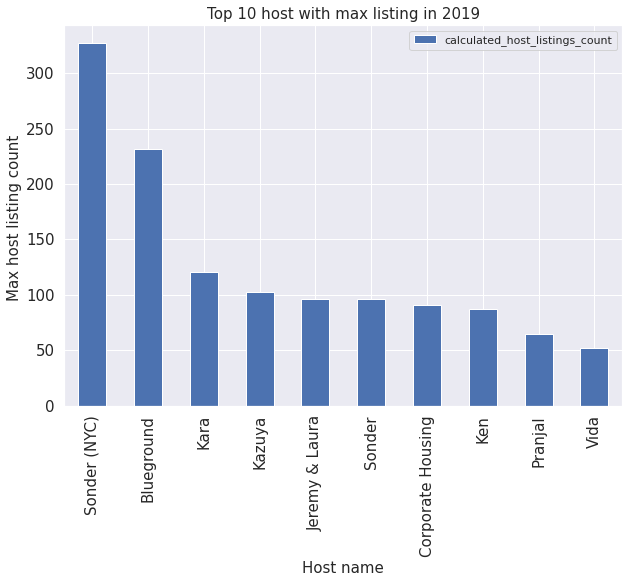

In [ ]:
host_with_max_listing.plot(kind="bar")
plt.title("Top 10 host with max listing in 2019",fontsize=15)
plt.xlabel("Host name",fontsize=15)
plt.ylabel("Max host listing count ",fontsize=15)


# **Top 10 host with maximum number of reviews in 2019?**

In [ ]:
host_with_max_reviews=airbnb_2019.groupby(["host_name"])["number_of_reviews"].max().reset_index().sort_values(["number_of_reviews"],ascending=False).head(10)

In [ ]:
host_with_max_reviews.set_index("host_name",inplace=True)

Text(0, 0.5, 'Max reviews ')

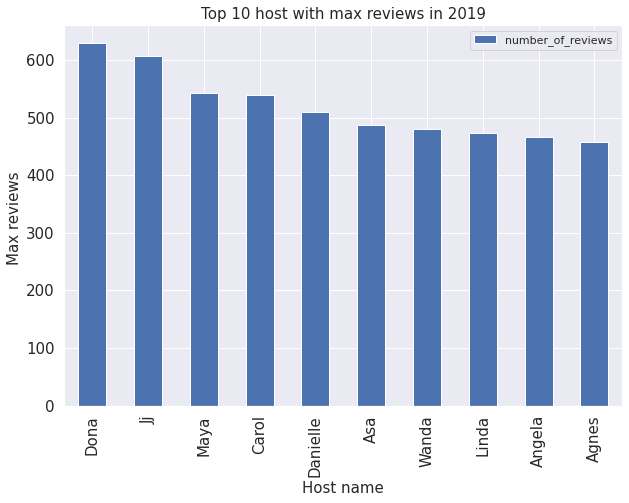

In [ ]:
host_with_max_reviews.plot(kind="bar")
plt.title("Top 10 host with max reviews in 2019",fontsize=15)
plt.xlabel("Host name",fontsize=15)
plt.ylabel("Max reviews ",fontsize=15)